In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
type(train_data), train_data.dtype, train_data.shape

(numpy.ndarray, dtype('float64'), (404, 13))

In [4]:
type(train_labels), train_labels.dtype, train_labels.shape

(numpy.ndarray, dtype('float64'), (404,))

In [5]:
train_labels = np.reshape(train_labels, newshape=(-1, 1))
test_labels = np.reshape(test_labels, newshape=(-1, 1))
train_labels.shape, test_labels.shape

((404, 1), (102, 1))

In [6]:
np.max(train_labels), np.min(train_labels)

(50.0, 5.0)

### Some Preprocessing

In [7]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()
my_scaler.fit(train_data)

train_data = my_scaler.transform(train_data)
test_data = my_scaler.transform(test_data)

### Creating and Training Model

In [9]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input((13, ))
first_hidden_layer = Dense(units=13, activation='relu')(input_layer)
second_hidden_layer = Dense(units=8, activation='relu')(first_hidden_layer)
third_hidden_layer = Dense(units=4, activation='relu')(second_hidden_layer)
prediction = Dense(units=1)(third_hidden_layer)

regression_model = Model(input_layer, prediction)

regression_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 8)                 112       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

regression_model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

regression_model.fit(x=train_data, y=train_labels, batch_size=8, epochs=200, validation_data=(test_data, test_labels), callbacks=[early_stop])

Epoch 1/200
51/51 [==============================] - 1s 6ms/step - loss: 583.4778 - val_loss: 608.2206
Epoch 2/200
51/51 [==============================] - 0s 3ms/step - loss: 570.5087 - val_loss: 586.8928
Epoch 3/200
51/51 [==============================] - 0s 3ms/step - loss: 534.7522 - val_loss: 529.4942
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 450.9308 - val_loss: 405.7039
Epoch 5/200
51/51 [==============================] - 0s 3ms/step - loss: 303.3004 - val_loss: 241.2735
Epoch 6/200
51/51 [==============================] - 0s 3ms/step - loss: 182.0902 - val_loss: 163.2130
Epoch 7/200
51/51 [==============================] - 0s 3ms/step - loss: 143.3459 - val_loss: 144.3817
Epoch 8/200
51/51 [==============================] - 0s 5ms/step - loss: 129.7276 - val_loss: 131.7092
Epoch 9/200
51/51 [==============================] - 0s 5ms/step - loss: 118.1526 - val_loss: 120.2702
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss:

### Model Evaluation

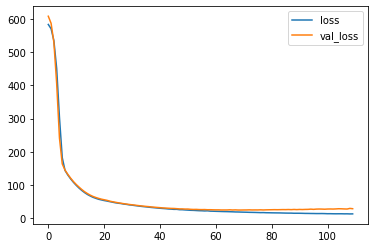

In [11]:
model_loss_history = pd.DataFrame(regression_model.history.history)
model_loss_history.plot()

In [12]:
predictions = regression_model.predict(test_data, batch_size=16)
predictions[1], test_labels[1]

7/7 [==============================] - 0s 3ms/step


(array([18.768442], dtype=float32), array([18.8]))

In [13]:
errors = 0.0
for idx in range(len(predictions)):
    if abs(predictions[idx] - test_labels[idx]) > 5.0:
        errors += 1.0
        
1 - (errors / len(predictions))        

0.7843137254901961